In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question2/esg.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
esg_df = pd.read_csv('/kaggle/input/question2/esg.csv')


In [4]:
esg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  990 non-null    object
 1   GVKEY         990 non-null    int64 
 2   Year          990 non-null    int64 
 3   ALL           990 non-null    int64 
 4   E             990 non-null    int64 
 5   S             990 non-null    int64 
 6   G             990 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 54.3+ KB


In [5]:
esg_df.head()

,Company Name,GVKEY,Year,ALL,E,S,G
0,UNITED OVERSEAS BANK LTD,15679,2013,38,24,30,54
1,UNITED OVERSEAS BANK LTD,15679,2013,30,10,21,48
2,UNITED OVERSEAS BANK LTD,15679,2014,33,10,23,56
3,UNITED OVERSEAS BANK LTD,15679,2014,43,28,33,60
4,UNITED OVERSEAS BANK LTD,15679,2015,33,10,23,54


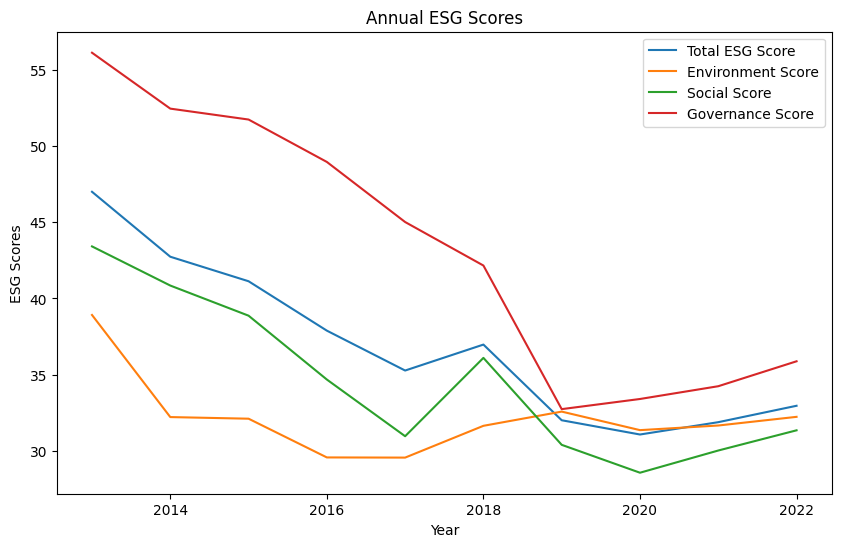

In [6]:
annual_scores = esg_df.groupby('Year')[['ALL', 'E', 'S', 'G']].mean()

# Plotting trends over years
plt.figure(figsize=(10, 6))
plt.plot(annual_scores['ALL'], label='Total ESG Score')
plt.plot(annual_scores['E'], label='Environment Score')
plt.plot(annual_scores['S'], label='Social Score')
plt.plot(annual_scores['G'], label='Governance Score')
plt.title('Annual ESG Scores')
plt.xlabel('Year')
plt.ylabel('ESG Scores')
plt.legend()
plt.show()

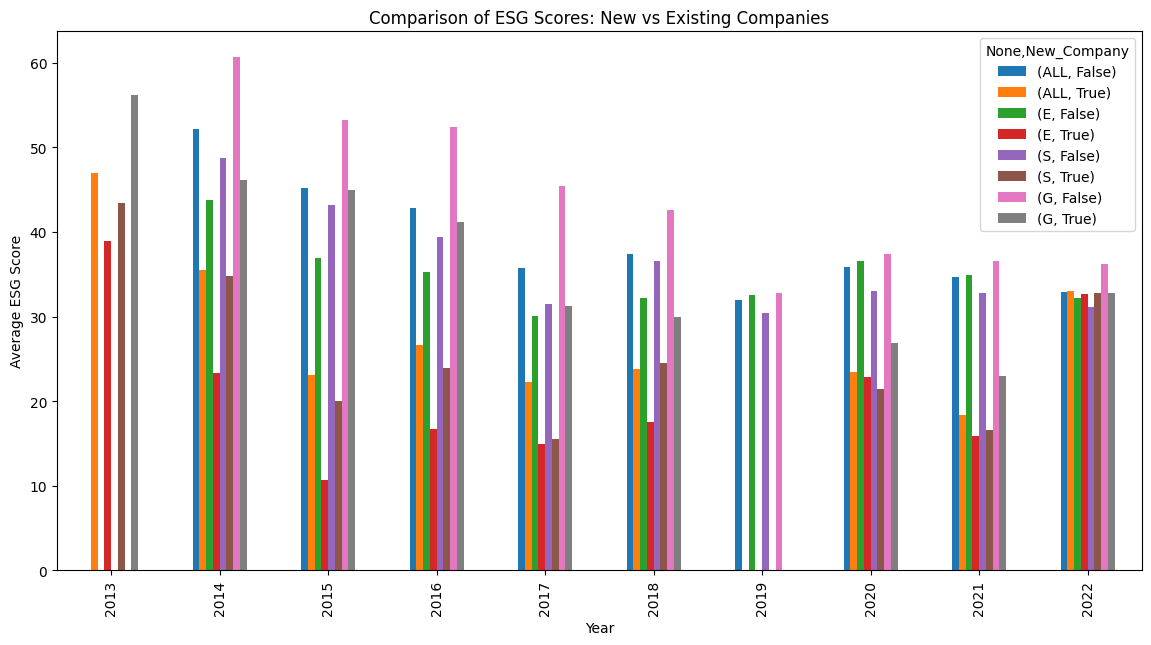

In [7]:
first_year = esg_df.groupby('GVKEY')['Year'].min()  # Find the first year each company was rated
esg_df = esg_df.join(first_year, on='GVKEY', rsuffix='_first_year')
esg_df['New_Company'] = esg_df['Year'] == esg_df['Year_first_year']

# Compare scores of new companies vs. existing ones
new_vs_existing = esg_df.groupby(['Year', 'New_Company'])[['ALL', 'E', 'S', 'G']].mean()
new_vs_existing.unstack().plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of ESG Scores: New vs Existing Companies')
plt.ylabel('Average ESG Score')
plt.show()

In [8]:
# Count the number of updates per company
update_counts = esg_df.groupby('GVKEY').size()
update_counts.name = 'Update_Count' 
# Join this count back to the main dataframe
esg_df = esg_df.join(update_counts, on='GVKEY', rsuffix='_update_count')

# Analyze trends based on update frequency
median_updates = update_counts.median()
frequent_updates = esg_df[esg_df['Update_Count'] > median_updates]
infrequent_updates = esg_df[esg_df['Update_Count'] <= median_updates]

# Example: Analyzing average scores for frequent vs. infrequent update companies
frequent_avg_scores = frequent_updates[['ALL', 'E', 'S', 'G']].mean()
infrequent_avg_scores = infrequent_updates[['ALL', 'E', 'S', 'G']].mean()

print("Average Scores for Companies with Frequent Updates: \n", frequent_avg_scores)
print("Average Scores for Companies with Infrequent Updates: \n", infrequent_avg_scores)

Average Scores for Companies with Frequent Updates: 
 ALL    37.501289
E      33.744845
S      35.114691
G      43.048969
dtype: float64
Average Scores for Companies with Infrequent Updates: 
 ALL    25.158879
E      23.915888
S      23.439252
G      28.906542
dtype: float64


In [9]:
# Set up the visual style for better readability
sns.set_style("whitegrid")

# Create a figure and set the size
plt.figure(figsize=(100, 100))

# Get unique companies
unique_companies = esg_df['GVKEY'].unique()
print(len(unique_companies))



81


<Figure size 10000x10000 with 0 Axes>

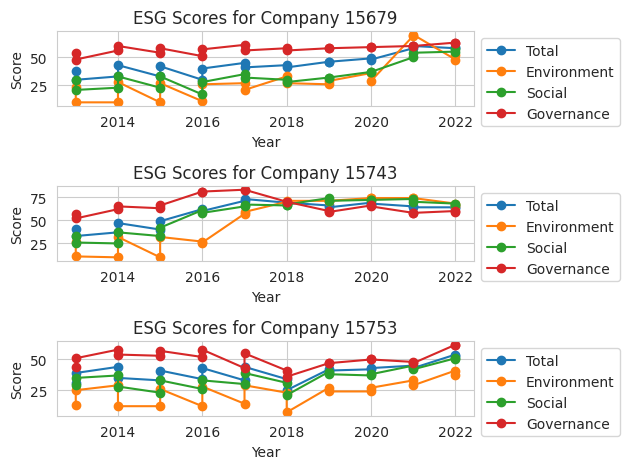

In [11]:
# Create a subplot for each company
for index, gvkey in enumerate(unique_companies[:3]):  # Adjust to plot more companies
    plt.subplot(3, 1, index + 1)  # Adjust the grid size based on how many plots you want
    company_data = esg_df[esg_df['GVKEY'] == gvkey]
    plt.plot(company_data['Year'], company_data['ALL'], marker='o', linestyle='-', label='Total')
    plt.plot(company_data['Year'], company_data['E'], marker='o', linestyle='-', label='Environment')
    plt.plot(company_data['Year'], company_data['S'], marker='o', linestyle='-', label='Social')
    plt.plot(company_data['Year'], company_data['G'], marker='o', linestyle='-', label='Governance')
    plt.title(f"ESG Scores for Company {gvkey}")
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [13]:
esg_df.sort_values(by=['GVKEY', 'Year'], inplace=True)

# Calculate yearly changes for each score category
esg_df['Change_ALL'] = esg_df.groupby('GVKEY')['ALL'].diff()
esg_df['Change_E'] = esg_df.groupby('GVKEY')['E'].diff()
esg_df['Change_S'] = esg_df.groupby('GVKEY')['S'].diff()
esg_df['Change_G'] = esg_df.groupby('GVKEY')['G'].diff()

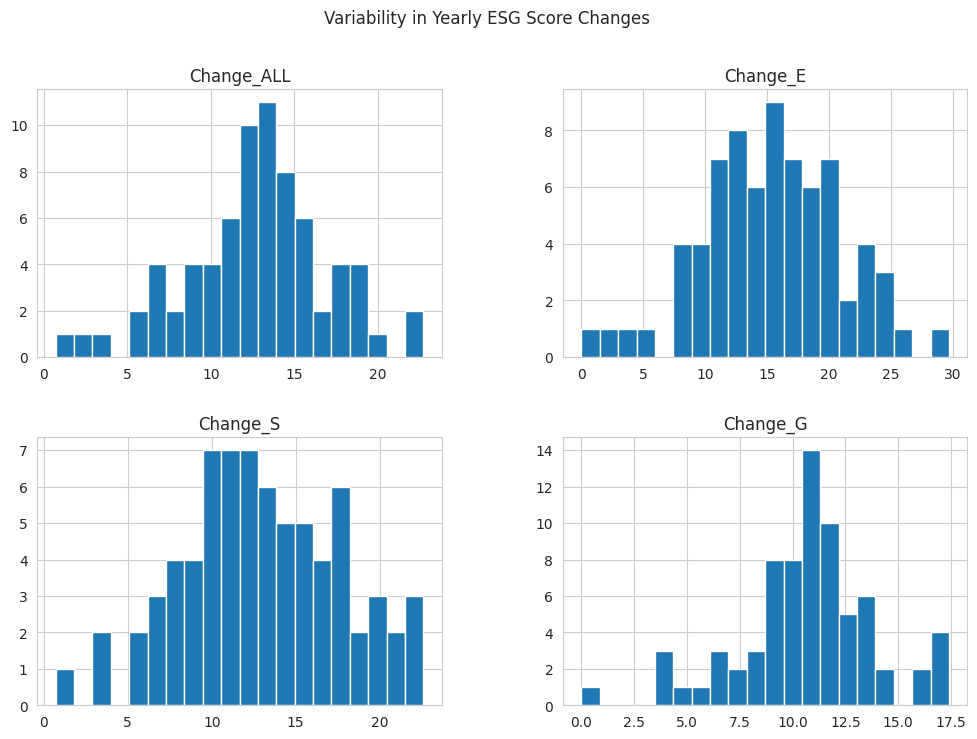

In [14]:
std_changes = esg_df.groupby('GVKEY')[['Change_ALL', 'Change_E', 'Change_S', 'Change_G']].std().dropna()

# Plot the results
import matplotlib.pyplot as plt

std_changes.hist(bins=20, layout=(2,2), figsize=(12, 8))
plt.suptitle('Variability in Yearly ESG Score Changes')
plt.show()

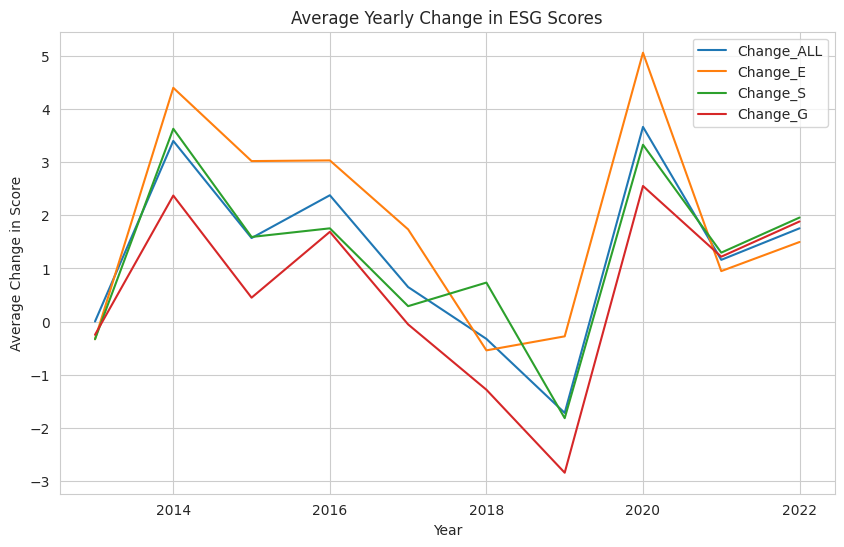

In [16]:
# Average change per year across all companies
avg_yearly_change = esg_df.groupby('Year')[['Change_ALL', 'Change_E', 'Change_S', 'Change_G']].mean()

avg_yearly_change.plot(kind='line', figsize=(10, 6))
plt.title('Average Yearly Change in ESG Scores')
plt.xlabel('Year')
plt.ylabel('Average Change in Score')
plt.grid(True)
plt.show()

In [17]:
from scipy.stats import wilcoxon

# Example: Test if changes in Total ESG scores are significant
# You'll need to pair each year's score change per company and perform the test
# Here's a simplified version:
sample_data = esg_df.dropna(subset=['Change_ALL'])

stat, p_value = wilcoxon(sample_data['Change_ALL'])
print('Wilcoxon Signed-Rank Test P-value:', p_value)

Wilcoxon Signed-Rank Test P-value: 0.001217775882699257
